Изготвил: Росица Динкова Тодинова, ф.н. 71624, специалност Информационни системи, 4 курс

# Опсиание на проекта

Целта на проекта е да предостави модел, който предсказва дали при даден пациент има риск от сърдечно заболяване в рамките на 10 години. Dataset-a, който е използван, съдържа данни, събрани от сърдечно-съдови изследвания. Той се състои от 15 атрибута и 4240 записа.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression, Ridge
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, BaggingClassifier, ExtraTreesClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from imblearn.over_sampling import SMOTE

import warnings
warnings.filterwarnings("ignore")

## Описание да dataset

In [2]:
heart_disease_dataset=pd.read_csv("framingham.csv")

In [3]:
heart_disease_dataset.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


Dataset-a съдържа следните колони:

CATEGORICAL DATA:
    - male (Пол): Приема стойност 0 за female и 1 за male.
    - education (Образование): Приема стойности 1 за Some High School, 2 за High School или GED, 3 за Some College или Vocational School и 4 зая College
    - currentSmoker (Пушач): Приема стойности 0 за непушач и 1 за пушач
    - BPMeds (Лекарства за кръвно налягане): Приема стойност 0 в случай, че пациентът не приема лекарства за кръвно налягане и 1 - ако приема.
    - prevalentStroke (Предишен сърдечен удар): Приема стойност 0, ако пациентът не е получавал сърдечен удар преди и 1 - ако е.
    - prevalentHyp (Свръхчувствителност): Приема стойност 0, ако пациентът не е развивал свръхчувствителност преди и 1 - ако е.
    - diabetes (Диабет): Приема стойност 0, ако пациентът няма диабет и 1 - ако има.
NUMERICAL DATA:
    - age (Години): Когато е правено изследването
    - cigsPerDay (Брой цигари на ден): Средно
    - totChol (Ниво на холестерол): Измерва се в mg/dL
    - sysBP (Систолно кръвно налягане): Горна граница на кръвно налягане. Измерва се в mmHg.
    - diaBP (Диастолно кръвно налягане): Долна граница на кръвно налягане. Измерва с в mmHg.
    - BMI - Body Mass Index (Индекс на телесната маса): Пресмята се по следната формула - Weight (kg) / Height(meter-squared)
    - heartRate (Сърдечен ритъм): Измерва се в Beats/Min
    - glucose (Глюкоза): Измерва се в mg/dL.
VALUE TO PREDICT:
    - TenYearCHD () - Стойността, която трябва да се предскаже, приема стойност 0, ако няма шанс пациентът да развие сърдечно заболяване в близките 10 години и 1 - ако има.

# Data Exploration

In [4]:
heart_disease_dataset.info();
names = list(heart_disease_dataset)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
male               4240 non-null int64
age                4240 non-null int64
education          4135 non-null float64
currentSmoker      4240 non-null int64
cigsPerDay         4211 non-null float64
BPMeds             4187 non-null float64
prevalentStroke    4240 non-null int64
prevalentHyp       4240 non-null int64
diabetes           4240 non-null int64
totChol            4190 non-null float64
sysBP              4240 non-null float64
diaBP              4240 non-null float64
BMI                4221 non-null float64
heartRate          4239 non-null float64
glucose            3852 non-null float64
TenYearCHD         4240 non-null int64
dtypes: float64(9), int64(7)
memory usage: 530.1 KB


In [5]:
heart_disease_dataset.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

От тук виждаме, че има само една характеристика, която има доста липсващи стойности - glucose. Също така. всички характеристики са сведени до числа - int и float, включително и categorical данните.

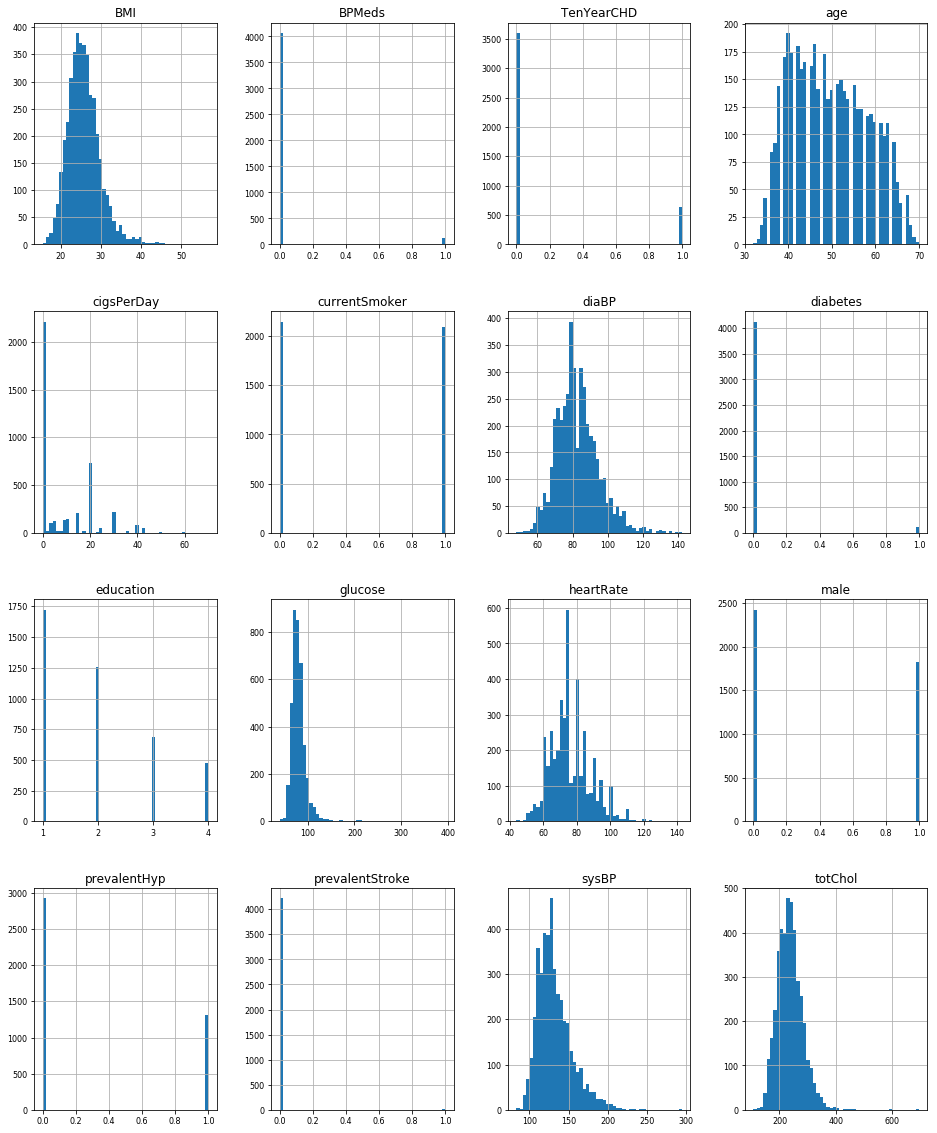

In [6]:
heart_disease_dataset.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8);

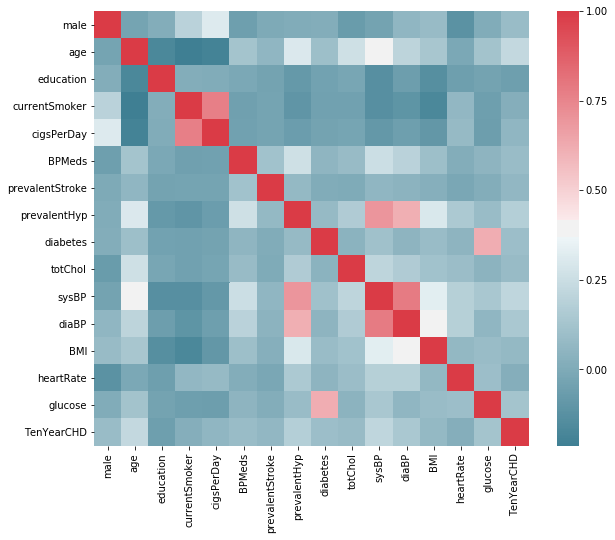

In [7]:
f, ax = plt.subplots(figsize=(10, 8))
corr = heart_disease_dataset.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax);

In [8]:
features_correlation = heart_disease_dataset.corr()['TenYearCHD'][:-1]
golden_features_list = features_correlation[abs(features_correlation) > 0.5].sort_values(ascending=False)
print("There are {} strongly correlated values with TenYearCHD:\n{}".format(len(golden_features_list), golden_features_list))

There are 0 strongly correlated values with TenYearCHD:
Series([], Name: TenYearCHD, dtype: float64)


In [9]:
features_correlation = heart_disease_dataset.corr()['TenYearCHD'][:-1]
golden_features_list = features_correlation[abs(features_correlation) > 0.2].sort_values(ascending=False)
print("There are {} not very strong correlated values with TenYearCHD:\n{}".format(len(golden_features_list), golden_features_list))

There are 2 not very strong correlated values with TenYearCHD:
age      0.225408
sysBP    0.216374
Name: TenYearCHD, dtype: float64


Най-силна корелация имаме между currentSmoker и cigsPerDay. Това, дали пациентът е развивал свръхчувствителност зависи от неговите долна и горна граница на кръвно налягане. Също така, това дали пациентът има диабет, зависи от глюкозата в кръвта му.

# Data Preparation - functions

Ако пациент е непушач, то той изпушва по 0 цигари на ден средно. За това ще запълним всички празни cigsPerDay за непушачите с 0. За пушачите могат да бъдат запълнени със средния брой изпушени цигари на ден на всички пациенти.

In [10]:
def fill_empty_smoking_attributes(heart_disease_dataset):
    heart_disease_dataset.loc[heart_disease_dataset['currentSmoker'] == 0, 'cigsPerDay'] = heart_disease_dataset.loc[heart_disease_dataset['currentSmoker'] == 0, 'cigsPerDay'].fillna(0)
    heart_disease_dataset['cigsPerDay'].fillna(heart_disease_dataset['cigsPerDay'].mean(), inplace=True)

Всички останали numerical характеристики с празни стойности също могат да бъдат запълнени със средното аритметично на стойностите в съответната колона.

In [11]:
def fill_null(heart_disease_dataset):
    heart_disease_dataset['sysBP'].fillna(heart_disease_dataset['totChol'].mean(), inplace=True);
    heart_disease_dataset['diaBP'].fillna(heart_disease_dataset['totChol'].mean(), inplace=True);
    heart_disease_dataset['totChol'].fillna(heart_disease_dataset['totChol'].mean(), inplace=True);
    heart_disease_dataset['BMI'].fillna(heart_disease_dataset['BMI'].mean(), inplace=True);
    heart_disease_dataset['heartRate'].fillna(heart_disease_dataset['heartRate'].mean(), inplace=True);
    heart_disease_dataset['glucose'].fillna(heart_disease_dataset['glucose'].mean(), inplace=True);
    heart_disease_dataset.fillna(0, inplace=True);

За да разберем дали това е правилно решение, ще опитаме и с премахване на всички features, които имат празни стойности. 

In [12]:
def clear_empty_data(heart_disease_dataset):
    heart_disease_dataset.dropna(axis=0,inplace=True)

In [13]:
fill_empty_smoking_attributes(heart_disease_dataset)
fill_null(heart_disease_dataset)

Нека заредим още веднъж dataset-a и да премахнем редовете, които съдържат празни стойности, за да сравним с кой dataset моделите ще се държат по-добре.

In [14]:
hdd_no_empty=pd.read_csv("framingham.csv")
clear_empty_data(hdd_no_empty)

In [15]:
X_train, X_test, y_train, y_test = train_test_split(heart_disease_dataset.iloc[:, :-1], heart_disease_dataset.iloc[:,-1], test_size=0.4, random_state=0)
X_train_e, X_test_e, y_train_e, y_test_e = train_test_split(hdd_no_empty.iloc[:, :-1], hdd_no_empty.iloc[:,-1], test_size=0.4, random_state=0)

## Oversampling

In [16]:
oversampler = SMOTE(random_state=12, ratio=1.0)
X_train, y_train = oversampler.fit_sample(X_train, y_train)

In [17]:
def plot_feature_importance(importances, names):
    plt.title("Feature importances")
    indices = np.argsort(importances)
    plt.barh(range(len(indices)), importances[indices], color='b', align='center')
    plt.yticks(range(len(indices)), [names[i] for i in indices])
    plt.show()

# Model building

Ще обучим няколко модела, като използваме Логистична регресия, DecisionTree класификатор, RandomForest класификатор, KNN. За да се извлече максималното от използваните алгоритми използваме hyperparameter optimization/tuning, като за целта използвам GridSearch - изпробват се всички комбинации с посочените параметри (време за кафе), както и RandomizedSearch - избират се произволни комбинации от параметри (ще я използвам за RandomForestClassifier); и се избира най-добрата на база оценка на модела.

## Logistic Regression

Като за начало ще намерим параметрите, с които ще можем да изсмучем максималното от модела ни - hyperparameter optimization. Ще използваме GridSearchCV, за да тестваме различни комбинации със следните параметри: C, penalty, tol.

In [18]:
parameters={"C":np.logspace(-3,3,10), "penalty":["l1","l2"], "tol":np.logspace(-3,3,10)}
logreg=LogisticRegression()
logreg_cv=GridSearchCV(logreg,parameters,cv=10);
logreg_cv.fit(X_train,y_train);

print("Optimized hpyerparameters:",logreg_cv.best_params_)
print("Score with optimized parameters:",logreg_cv.best_score_)

Optimized hpyerparameters: {'tol': 0.001, 'C': 10.0, 'penalty': 'l2'}
Score with optimized parameters: 0.6834883720930233


In [19]:
def train_model_with_logistic_regression(X_train, y_train, X_test, y_test, params={}):
    model = LogisticRegression(**params);
    model.fit(X_train, y_train)
    print(sorted(list(zip(map(abs, model.coef_.tolist()[0]), names)), reverse=True))
    print("Train score: " + str(model.score(X_train, y_train)))
    print("Test score: " + str(model.score(X_test, y_test)))
    return model.predict(X_test)

Да проверим какъв score ще получим върху двата dataset-a - единия със запълнените празни стойности и другия с премахнатите редове с празни стойности. Ще тестваме какъв score ще получим и с оптимизираните хиперпараметри, които получихме.

In [20]:
y_predicted = train_model_with_logistic_regression(X_train, y_train, X_test, y_test)

[(0.7562891731434082, 'prevalentStroke'), (0.5918651534661703, 'male'), (0.3754983746797482, 'prevalentHyp'), (0.17711122203460214, 'diabetes'), (0.1763077348043504, 'currentSmoker'), (0.06978691464792029, 'age'), (0.04627791798746718, 'BPMeds'), (0.01705687129289998, 'education'), (0.01591136848613158, 'cigsPerDay'), (0.014125399271567838, 'BMI'), (0.00965215159668823, 'sysBP'), (0.0037120285133735824, 'glucose'), (0.0014384322746161503, 'totChol'), (0.0014359425355955863, 'diaBP'), (0.0013695686219544582, 'heartRate')]
Train score: 0.6823255813953488
Test score: 0.6845518867924528


In [21]:
train_model_with_logistic_regression(X_train_e, y_train_e, X_test_e, y_test_e)

[(0.5913158861919798, 'prevalentStroke'), (0.4730424875766562, 'prevalentHyp'), (0.40031258875085535, 'male'), (0.2089225233434471, 'BPMeds'), (0.18514603556634582, 'diabetes'), (0.09879203309216783, 'education'), (0.033882411309108726, 'age'), (0.019149590048654148, 'cigsPerDay'), (0.015424606785890476, 'sysBP'), (0.013868641355043279, 'heartRate'), (0.010460006491813832, 'diaBP'), (0.005227024725092503, 'currentSmoker'), (0.00507461589217372, 'glucose'), (0.0034446311589377736, 'BMI'), (0.0007344229707698127, 'totChol')]
Train score: 0.8600729261622607
Test score: 0.8394808743169399


array([0, 0, 0, ..., 0, 0, 0])

Очевидно модела ни се справя по-добре с тестовите данни от първия dataset - този със запълнените празни стойности. При използването на dataset-a с премахнатите стойности виждаме и overfitting.

In [22]:
train_model_with_logistic_regression(X_train, y_train, X_test, y_test, logreg_cv.best_params_)

[(0.9179780636956748, 'prevalentStroke'), (0.6069078808235071, 'male'), (0.25571148695360807, 'prevalentHyp'), (0.22515783459489488, 'currentSmoker'), (0.07545821460351305, 'age'), (0.03208746128286356, 'diabetes'), (0.02291927400263549, 'BMI'), (0.015382550027196818, 'cigsPerDay'), (0.010354975969445042, 'sysBP'), (0.005091588066479851, 'glucose'), (0.004134184910213082, 'education'), (0.0019579700921387665, 'totChol'), (0.0016022099683349823, 'diaBP'), (0.001473417123766825, 'heartRate'), (0.0011481161680337948, 'BPMeds')]
Train score: 0.684186046511628
Test score: 0.6863207547169812


array([1, 0, 1, ..., 0, 1, 0])

### Confusion Matrix при Logistic regression

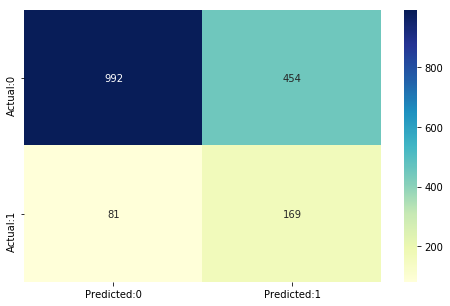

In [23]:
cm=confusion_matrix(y_test,y_predicted)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

In [24]:
recall = cm[0, 0] / (cm[0, 0]+cm[1, 0])
print("Recall" + str(recall))

Recall0.9245107176141659


Както се вижда от матрицата, моделът ни се справя добре при предсказване, че пациента няма шанс от сърдечно заболяване в близките 10 години, когато наистина е така. Проблемът е при предсказване, че пациентът има шанс за сърдечно заболяване. Само в 14 от случаите, моделът е познал, че пациентът има шанс за сърдечно заболяване в близките 10 години. В останалите 236 случаи е объркал, което е фатално в този случай (по-добре да предскажем на здрав човек, че е болен, отколкото обратното). Това се дължи на използването на логистична регресия. Както видяхме в heatmap-a, стойността, която предсказваме не е много зависима от останалите характеристики и за това в случая логистичната регресия не ни върши много добра работа. Приличният score се дължи на това, че доста голяма част от данните в dataset-a показват, че пациент няма шанс за сърдечни заболявания в близките 10 години.

## Decision Tree Classification

При Decision Tree Classification отново ще направим hyperparameter optimization и ще обучим и тестваме модела.

In [25]:
parameters={"criterion":["gini", "entropy"], "splitter":["best","random"], "max_depth": range(1, 110, 10)}
dtree=DecisionTreeClassifier()
dtree_cv=GridSearchCV(dtree,parameters,cv=10);
dtree_cv.fit(X_train,y_train);

print("Optimized hpyerparameters:",dtree_cv.best_params_)
print("Score with optimized parameters:",dtree_cv.best_score_)

Optimized hpyerparameters: {'criterion': 'entropy', 'max_depth': 51, 'splitter': 'random'}
Score with optimized parameters: 0.8425581395348837


In [26]:
def train_model_with_decision_tree(X_train, y_train, X_test, y_test, params={}):
    model = DecisionTreeClassifier(**params).fit(X_train,y_train)
    print(sorted(zip(map(lambda x: round(x, 4), model.feature_importances_), names), reverse=True))
    plot_feature_importance(model.feature_importances_, names)
    scores = cross_val_score(model, X_train, y_train, cv=5)
    print("Train score: " + str(scores.mean()))
    scores = cross_val_score(model, X_test, y_test, cv=5)
    print("Test score: " + str(scores.mean()))
    return model.predict(X_test)

[(0.1964, 'male'), (0.1869, 'age'), (0.0982, 'totChol'), (0.089, 'sysBP'), (0.0688, 'heartRate'), (0.0647, 'glucose'), (0.0629, 'prevalentHyp'), (0.0557, 'diaBP'), (0.0522, 'cigsPerDay'), (0.0511, 'BMI'), (0.0352, 'education'), (0.0282, 'currentSmoker'), (0.0047, 'diabetes'), (0.0033, 'prevalentStroke'), (0.0028, 'BPMeds')]


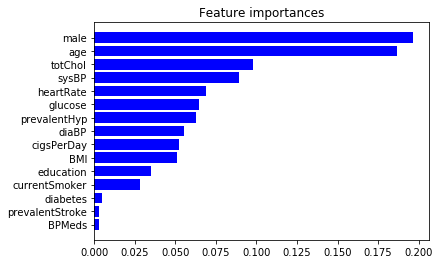

Train score: 0.8293023255813953
Test score: 0.7470518826999826


In [27]:
y_predicted = train_model_with_decision_tree(X_train, y_train, X_test, y_test)

[(0.1638, 'BMI'), (0.1541, 'glucose'), (0.1439, 'sysBP'), (0.1232, 'diaBP'), (0.1216, 'totChol'), (0.0961, 'heartRate'), (0.0777, 'age'), (0.0464, 'cigsPerDay'), (0.0265, 'male'), (0.0202, 'education'), (0.0094, 'BPMeds'), (0.0074, 'prevalentHyp'), (0.0063, 'prevalentStroke'), (0.0019, 'currentSmoker'), (0.0015, 'diabetes')]


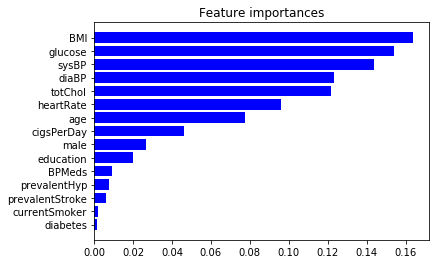

Train score: 0.7579872176377309
Test score: 0.7670928982187106


array([0, 1, 0, ..., 0, 1, 0])

In [28]:
train_model_with_decision_tree(X_train_e, y_train_e, X_test_e, y_test_e)

[(0.1483, 'age'), (0.1327, 'male'), (0.1026, 'prevalentHyp'), (0.0834, 'education'), (0.0821, 'sysBP'), (0.0765, 'totChol'), (0.0686, 'currentSmoker'), (0.0639, 'diaBP'), (0.0636, 'heartRate'), (0.0577, 'BMI'), (0.0565, 'glucose'), (0.0458, 'cigsPerDay'), (0.009, 'diabetes'), (0.0082, 'BPMeds'), (0.001, 'prevalentStroke')]


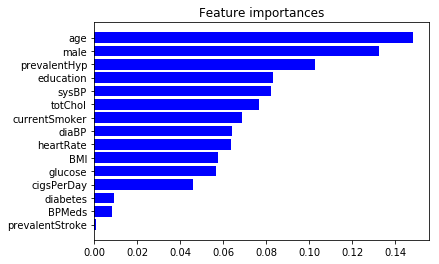

Train score: 0.8353488372093023
Test score: 0.7665052923824397


In [29]:
y_predicted_opt = train_model_with_decision_tree(X_train, y_train, X_test, y_test, dtree_cv.best_params_)

## Confusion matrix при Decision Tree Classification

Нека погледнем confusion матриците, когато не използваме hyperparameter optimization и когато - да. 

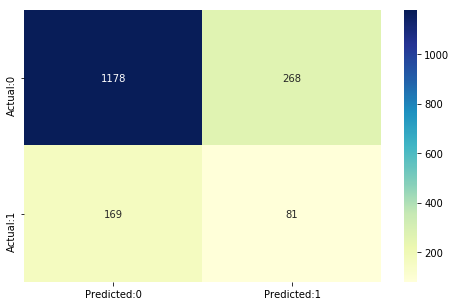

In [30]:
cm=confusion_matrix(y_test, y_predicted)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

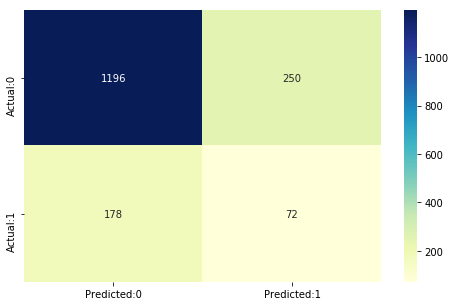

In [31]:
cm=confusion_matrix(y_test, y_predicted_opt)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

В първия случай имаме подобрение в сравнение с използването на логистична регресия. Въпреки че моделът ни е определил за малко повече хора, че потенциално са застрашени от сърдечни заболявания, а това не е така, той е успял да предскаже за 70 човека, че имат шанс за сърдечно заболяване и е познал. Вече споменахме, че предпочитаме моделът ни да каже на здравия болен, отколкото на болния - здрав. За това, въпреки ниският score, имаме напредък. 
Странното тук е confusion матрицата при използване на hyperparameter optimization. С цел постигане на по-висок score, параметрите са така избрани, че моделът ни вече предсказва за всички, че нямат шанс от сърдечно заболяване.

## Random Forest Classification

При Random Forest Classification, за оптимизиране на хиперпараметрите, ще използваме методът RandomizedSearch, тъй като всевъзможните комбинации на избраните параметри са много и времето за изпробване и сравняване на всички е доста. Този метод не дава гаранция, че ще намери най-добрите параметри.

In [32]:
parameters={"n_estimators": range(1, 201, 10), "max_features":["auto","sqrt"], "max_depth":range(1, 101, 10), "min_samples_split":range(2,10,1), "min_samples_leaf":[1, 2, 4], "bootstrap":[True, False]}
rforest=RandomForestClassifier()
rforest_cv=RandomizedSearchCV(rforest,parameters,cv=10);
rforest_cv.fit(X_train,y_train);

print("Optimized hpyerparameters:",rforest_cv.best_params_)
print("Score with optimized parameters:",rforest_cv.best_score_)

Optimized hpyerparameters: {'min_samples_split': 6, 'bootstrap': False, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 61, 'n_estimators': 121}
Score with optimized parameters: 0.9116279069767442


In [33]:
def train_model_with_random_forest(X_train, y_train, X_test, y_test, params={}):
    model = RandomForestClassifier(**params).fit(X_train,y_train);
    print(sorted(zip(map(lambda x: round(x, 4), model.feature_importances_), names), reverse=True))
    plot_feature_importance(model.feature_importances_, names)
    scores = cross_val_score(model, X_train, y_train, cv=5)
    print("Train score: " + str(scores.mean()))
    scores = cross_val_score(model, X_test, y_test, cv=5)
    print("Test score: " + str(scores.mean()))
    return model.predict(X_test)

[(0.1579, 'age'), (0.1248, 'male'), (0.0911, 'prevalentHyp'), (0.0864, 'sysBP'), (0.0761, 'heartRate'), (0.0755, 'diaBP'), (0.0749, 'totChol'), (0.0727, 'education'), (0.0693, 'BMI'), (0.0678, 'glucose'), (0.0478, 'cigsPerDay'), (0.0392, 'currentSmoker'), (0.0079, 'BPMeds'), (0.0058, 'diabetes'), (0.0026, 'prevalentStroke')]


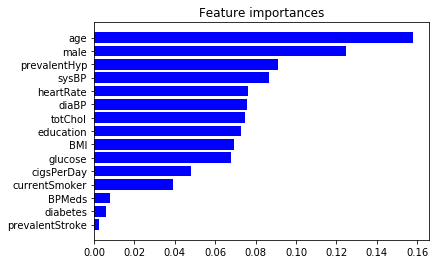

Train score: 0.8811627906976744
Test score: 0.8408051362137776


array([0, 0, 0, ..., 0, 0, 0])

In [34]:
train_model_with_random_forest(X_train, y_train, X_test, y_test)

[(0.1477, 'sysBP'), (0.1331, 'BMI'), (0.1261, 'diaBP'), (0.1185, 'totChol'), (0.1156, 'age'), (0.1139, 'glucose'), (0.0949, 'heartRate'), (0.0577, 'cigsPerDay'), (0.0323, 'education'), (0.0209, 'male'), (0.0144, 'prevalentHyp'), (0.009, 'currentSmoker'), (0.0085, 'BPMeds'), (0.0057, 'diabetes'), (0.0016, 'prevalentStroke')]


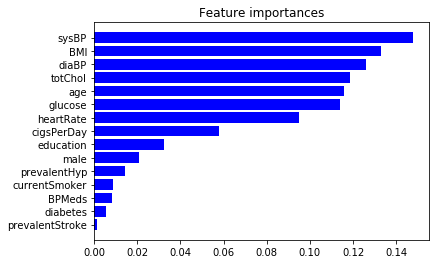

Train score: 0.8482288371908305
Test score: 0.8224157277105053


array([0, 0, 0, ..., 0, 0, 0])

In [35]:
train_model_with_random_forest(X_train_e, y_train_e, X_test_e, y_test_e)

[(0.1544, 'age'), (0.1491, 'male'), (0.0862, 'sysBP'), (0.0838, 'prevalentHyp'), (0.0833, 'education'), (0.0755, 'totChol'), (0.0671, 'diaBP'), (0.0643, 'glucose'), (0.0639, 'heartRate'), (0.059, 'BMI'), (0.052, 'cigsPerDay'), (0.0429, 'currentSmoker'), (0.0094, 'BPMeds'), (0.0073, 'diabetes'), (0.0019, 'prevalentStroke')]


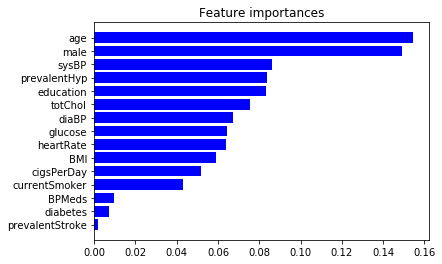

Train score: 0.8993023255813954
Test score: 0.8413968419226098


In [36]:
y_predicted_opt = train_model_with_random_forest(X_train, y_train, X_test, y_test, rforest_cv.best_params_)

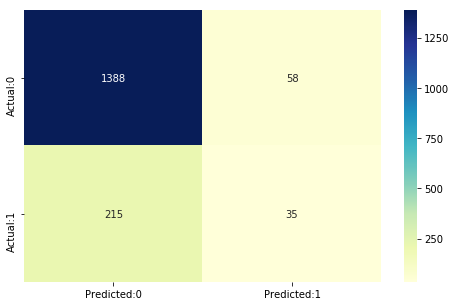

In [37]:
cm=confusion_matrix(y_test, y_predicted_opt)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

## Extra Trees Classification

In [38]:
parameters={"n_estimators": range(1, 201, 10), "max_features":["auto","sqrt"], "max_depth":range(1, 101, 10), "min_samples_split":range(2,10,1), "min_samples_leaf":[1, 2, 4], "bootstrap":[True, False], "random_state":[42,43,44]}
extra_trees=ExtraTreesClassifier()
extra_trees_cv=RandomizedSearchCV(extra_trees,parameters,cv=10);
extra_trees_cv.fit(X_train,y_train);

print("Optimized hpyerparameters:",extra_trees_cv.best_params_)
print("Score with optimized parameters:",extra_trees_cv.best_score_)

Optimized hpyerparameters: {'random_state': 43, 'min_samples_split': 5, 'bootstrap': False, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 71, 'n_estimators': 51}
Score with optimized parameters: 0.9204651162790698


In [39]:
def train_model_with_extra_trees(X_train, y_train, X_test, y_test, params={}):
    model = ExtraTreesClassifier(**params)
    model.fit(X_train, y_train)
    print(sorted(zip(map(lambda x: round(x, 4), model.feature_importances_), names), reverse=True))
    scores = cross_val_score(model, X_train, y_train, cv=5)
    print("Train score: " + str(scores.mean()))
    scores = cross_val_score(model, X_test, y_test, cv=5)
    print("Test score: " + str(scores.mean()))
    return model.predict(X_test)

In [40]:
train_model_with_extra_trees(X_train, y_train, X_test, y_test)

[(0.1352, 'male'), (0.1156, 'age'), (0.1139, 'prevalentHyp'), (0.0803, 'sysBP'), (0.0777, 'totChol'), (0.0731, 'education'), (0.0696, 'diaBP'), (0.0691, 'BMI'), (0.068, 'glucose'), (0.0655, 'heartRate'), (0.0537, 'currentSmoker'), (0.0496, 'cigsPerDay'), (0.012, 'BPMeds'), (0.0111, 'diabetes'), (0.0057, 'prevalentStroke')]
Train score: 0.9090697674418605
Test score: 0.8396269304181849


array([0, 0, 0, ..., 0, 0, 0])

In [41]:
train_model_with_extra_trees(X_train_e, y_train_e, X_test_e, y_test_e)

[(0.1252, 'sysBP'), (0.1187, 'diaBP'), (0.1119, 'BMI'), (0.111, 'age'), (0.1102, 'glucose'), (0.1055, 'heartRate'), (0.1051, 'totChol'), (0.0625, 'education'), (0.0608, 'cigsPerDay'), (0.0267, 'prevalentHyp'), (0.0241, 'male'), (0.0174, 'currentSmoker'), (0.0103, 'BPMeds'), (0.0077, 'diabetes'), (0.003, 'prevalentStroke')]
Train score: 0.8482257025902296
Test score: 0.8224040394595352


array([0, 0, 0, ..., 0, 0, 0])

In [42]:
y_predicted_opt = train_model_with_extra_trees(X_train, y_train, X_test, y_test, extra_trees_cv.best_params_)

[(0.1518, 'male'), (0.1249, 'age'), (0.1232, 'prevalentHyp'), (0.0791, 'sysBP'), (0.0735, 'education'), (0.0678, 'totChol'), (0.0624, 'glucose'), (0.0597, 'diaBP'), (0.0578, 'heartRate'), (0.0578, 'currentSmoker'), (0.0574, 'BMI'), (0.0512, 'cigsPerDay'), (0.0143, 'BPMeds'), (0.0132, 'diabetes'), (0.006, 'prevalentStroke')]
Train score: 0.9162790697674419
Test score: 0.8455214298108624


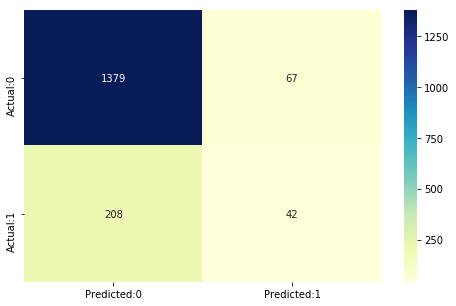

In [43]:
cm=confusion_matrix(y_test, y_predicted_opt)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

## KNeighbors Classification

In [44]:
parameters={"n_neighbors": range(1, 201, 10), "algorithm":["auto", "ball_tree", "kd_tree", "brute"], "leaf_size":range(1, 101, 10)}
knn=KNeighborsClassifier()
knn_cv=RandomizedSearchCV(knn,parameters,cv=10);
knn_cv.fit(X_train,y_train);

print("Optimized hpyerparameters:", knn_cv.best_params_)
print("Score with optimized parameters:", knn_cv.best_score_)

Optimized hpyerparameters: {'n_neighbors': 1, 'algorithm': 'ball_tree', 'leaf_size': 51}
Score with optimized parameters: 0.8872093023255814


In [45]:
def train_model_with_knn(X_train, y_train, X_test, y_test, params={}):
    model = KNeighborsClassifier(**params)
    model.fit(X_train, y_train)
    scores = cross_val_score(model, X_train, y_train, cv=5)
    print("Train score: " + str(scores.mean()))
    scores = cross_val_score(model, X_test, y_test, cv=5)
    print("Test score: " + str(scores.mean()))
    return model.predict(X_test)

In [46]:
y_predicted = train_model_with_knn(X_train, y_train, X_test, y_test)

Train score: 0.8146511627906976
Test score: 0.8331424605240327


In [47]:
train_model_with_knn(X_train, y_train, X_test, y_test, knn_cv.best_params_)

Train score: 0.8797674418604652
Test score: 0.7765452021516571


array([1, 1, 1, ..., 0, 0, 0])

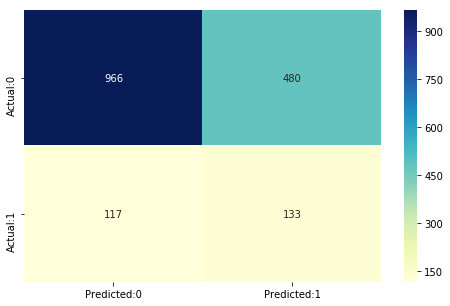

In [48]:
cm=confusion_matrix(y_test, y_predicted)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

# Voting and Bagging Classification

In [49]:
clf1 = LogisticRegression()
clf2 = RandomForestClassifier()
clf3 = DecisionTreeClassifier(max_depth=1, splitter='best', criterion='gini')
eclf1 = VotingClassifier(estimators=[('lr', clf1), ('rf', clf2), ('dt', clf3)], voting='hard')
eclf1 = eclf1.fit(X_train, y_train)
for clf, label in zip([clf2, clf3, clf1, eclf1], ['Random Forest', 'Decision Tree', 'Logistic Regression', 'Ensemble']):
    scores = cross_val_score(clf, X_train, y_train, cv=10, scoring='accuracy')
    print("Accuracy: %0.3f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), label))

Accuracy: 0.888 (+/- 0.11) [Random Forest]
Accuracy: 0.656 (+/- 0.02) [Decision Tree]
Accuracy: 0.679 (+/- 0.02) [Logistic Regression]
Accuracy: 0.761 (+/- 0.04) [Ensemble]


In [50]:
for clf in [clf1, clf2, clf3]:
    vanilla_scores = cross_val_score(clf, X_train, y_train, cv=10, n_jobs=-1)
    bagging_clf = BaggingClassifier(clf, 
       max_samples=0.4, max_features=10, random_state=42)
    bagging_scores = cross_val_score(bagging_clf, X_train, y_train, cv=10, 
       n_jobs=-1)
    
    print("Mean of: {1:.3f}, std: (+/-) {2:.3f} [{0}]".format(clf.__class__.__name__, vanilla_scores.mean(), vanilla_scores.std()))
    print("Mean of: {1:.3f}, std: (+/-) {2:.3f} [Bagging {0}]\n".format(clf.__class__.__name__, bagging_scores.mean(), bagging_scores.std()))

Mean of: 0.679, std: (+/-) 0.018 [LogisticRegression]
Mean of: 0.675, std: (+/-) 0.018 [Bagging LogisticRegression]

Mean of: 0.895, std: (+/-) 0.095 [RandomForestClassifier]
Mean of: 0.877, std: (+/-) 0.103 [Bagging RandomForestClassifier]

Mean of: 0.656, std: (+/-) 0.017 [DecisionTreeClassifier]
Mean of: 0.687, std: (+/-) 0.031 [Bagging DecisionTreeClassifier]

